In [1]:
# Common
import os
import keras 
import numpy as np
import tensorflow as tf

# Data
from keras.preprocessing.image import ImageDataGenerator as IDG

# Data Viz
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Pre-Trained Models
from tensorflow.keras.applications import InceptionV3, Xception, ResNet152V2, ResNet50V2, ResNet50

# Model
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization, Layer, ReLU, Add, InputLayer, Multiply

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model viz
from tensorflow.keras.utils import plot_model

In [4]:
root_path = "C:\\Users\\User\\Downloads\\archive\\dataset"

class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

print(f"Total No. of Classes : {n_classes}")

Total No. of Classes : 11


In [5]:
class_dis = [len(os.listdir(root_path + "/" + name)) for name in class_names]
class_dis

[698, 851, 475, 639, 591, 377, 526, 232, 1160, 692, 621]

In [6]:
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution")
fig.update_layout({'title':{'x':0.5}})
fig.show()

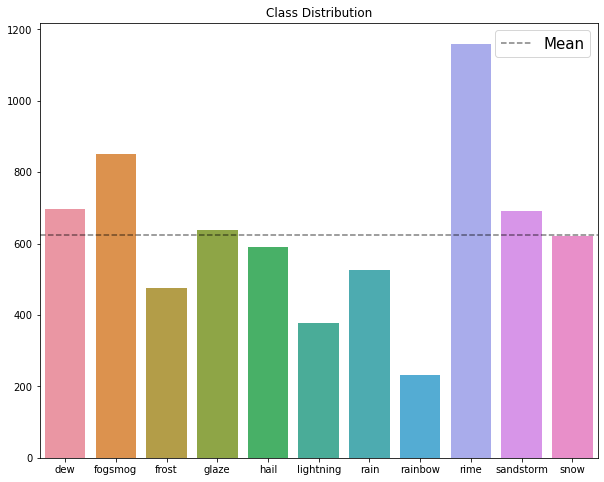

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(
    x=class_names, 
    y=class_dis
)
plt.axhline(np.mean(class_dis), alpha=0.5, linestyle='--', color='k', label="Mean")
plt.title("Class Distribution")
plt.legend(fontsize=15)
plt.show()

In [8]:
# Initialize DataGenerator
train_gen = IDG(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

# Load Data
train_ds = train_gen.flow_from_directory(root_path, target_size=(256,256), class_mode="binary", subset='training', shuffle=True, batch_size=32)
valid_ds = train_gen.flow_from_directory(root_path, target_size=(256,256), class_mode="binary", subset='validation', shuffle=True, batch_size=32)

Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


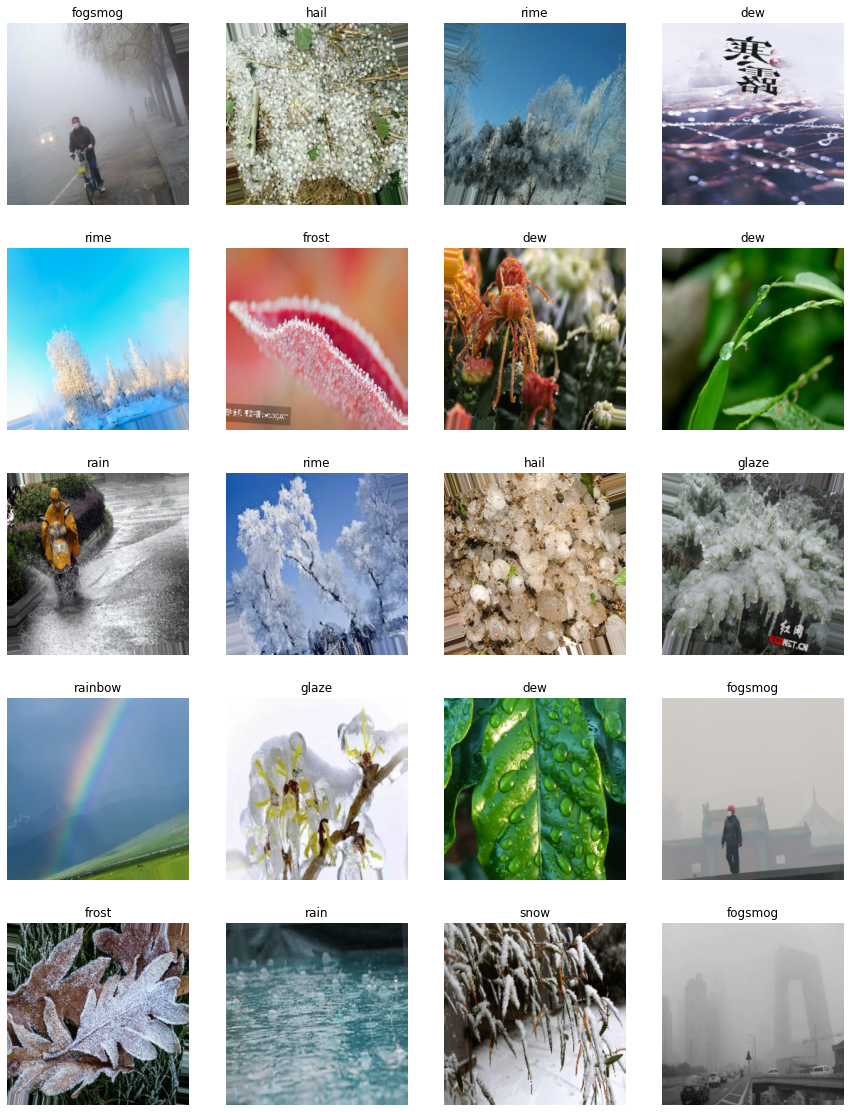

In [9]:
i=1
plt.figure(figsize=(15,20))
for images, labels in train_ds:
    id = np.random.randint(len(images))
    image, label = images[id], int(labels[id])

    plt.subplot(5, 4, i)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis('off')

    i+=1
    if i>=21: break

plt.show()

# ResNet152V2
I tried out various models such as inception, Xception and other versions of ResNet, but ResNet 150V2 seems to perform the best. The performance is very close to what Xception reached. The training accuracy Resnet 150V2 reached is 91% and validation accuracy is 87%, whereas Xception reach 90% to 86% accuracy, respectively.
I have also tried out different compositions for these particular pre trained models.

In [10]:
name = 'resnet'
# TL Model
base_model = ResNet152V2(include_top=False, input_shape=(256,256,3))
base_model.trainable = False

# Model
model = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation="softmax")
])

# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
cbs = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint(name + ".h5", save_best_only=True)
]

234545216/234545216 [==============================] - 70s 0us/step


1/1 [==============================] - 1s 549ms/step


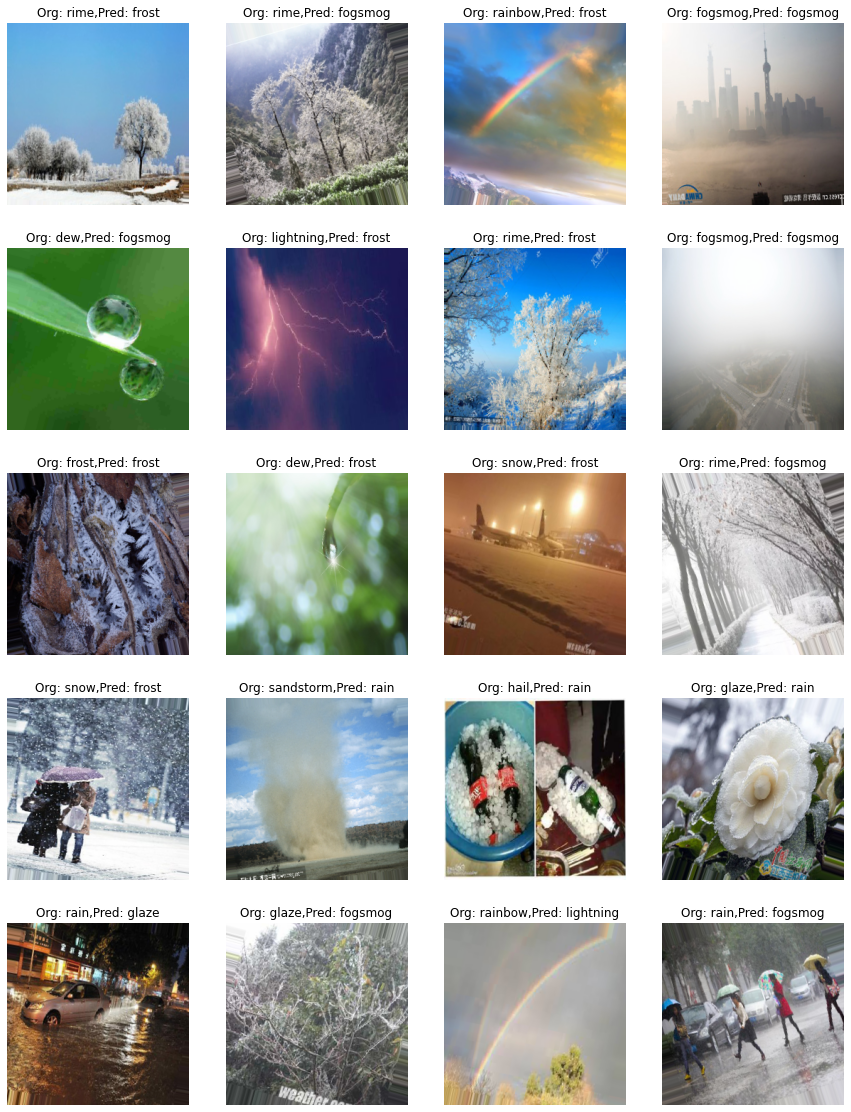

In [13]:
i=1
plt.figure(figsize=(15,20))
for images, labels in train_ds:
    id = np.random.randint(len(images))
    image, label = images[id], int(labels[id])
    pred_label = class_names[np.argmax(model.predict(image[np.newaxis,...]))]

    plt.subplot(5, 4, i)
    plt.imshow(image)
    plt.title(f"Org: {class_names[label]},Pred: {pred_label}")
    plt.axis('off')

    i+=1
    if i>=21: break

plt.show()

In [14]:
model.evaluate(valid_ds)

43/43 [==============================] - 661s 15s/step - loss: 2.6343 - accuracy: 0.1234


[2.6343350410461426, 0.12344776839017868]